In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('time_series_2019-ncov-Confirmed.csv')

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [6]:
df.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,42.171200,22.380900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [15]:
percent=df[df == 0].count(axis=0)/len(df.index)

In [16]:
percent

Province/State    0.000000
Country/Region    0.000000
Lat               0.000000
Long              0.000000
1/22/20           0.940452
                    ...   
3/18/20           0.445585
3/19/20           0.433265
3/20/20           0.414784
3/21/20           0.404517
3/22/20           0.394251
Length: 65, dtype: float64

In [78]:
print(percent)

Province/State    0.000000
Country/Region    0.000000
Lat               0.000000
Long              0.000000
1/22/20           0.940452
                    ...   
3/18/20           0.445585
3/19/20           0.433265
3/20/20           0.414784
3/21/20           0.404517
3/22/20           0.394251
Length: 65, dtype: float64


In [28]:
percent1=percent[percent>0.7]


In [52]:
p1=percent1.index

In [53]:
p1

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20'],
      dtype='object')

In [55]:
df=df.drop(columns=p1)

In [56]:
df

,Province/State,Country/Region,Lat,Long,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,43,47,48,50,50,50,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,331,360,420,461,502,511,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,110,117,130,138,150,150,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,50,50,83,93,99,117,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.4150,-61.3710,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,-61.6790,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,-18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
df.shape

(487, 23)

In [98]:
data=df.drop(columns=['Province/State'])

In [112]:
data.head()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [120]:
df1 = data.groupby(['Country/Region'],as_index=False).sum()

In [121]:
df1.tail()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
166,Uzbekistan,0,0,0,0,0,0,0,0,0,0,0,1,6,10,15,23,33,43,43
167,Venezuela,0,0,0,0,0,0,0,0,0,0,2,10,17,33,36,42,42,70,70
168,Vietnam,16,16,16,18,30,30,31,38,39,47,53,56,61,66,75,85,91,94,113
169,Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3
170,Zimbabwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3


In [122]:
df1.shape

(171, 20)

In [123]:
df2=df1.copy()

In [124]:
dcols=list(df2.columns)

In [125]:
o=[]
for column in dcols:
  t=df2[column].sum()
  o.append(t)

In [126]:
rowsum=df2.sum(axis=1)

In [127]:
df2['Total ']=rowsum
df2.head()

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
0,Afghanistan,1,1,1,1,4,4,5,7,7,...,11,16,21,22,22,22,24,24,40,240
1,Albania,0,0,0,0,0,2,10,12,23,...,38,42,51,55,59,64,70,76,89,624
2,Algeria,12,12,17,17,19,20,20,20,24,...,37,48,54,60,74,87,90,139,201,977
3,Andorra,1,1,1,1,1,1,1,1,1,...,1,1,2,39,39,53,75,88,113,421
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,5


In [133]:
a1=df2['Country/Region']
a2=df2['Total ']
a1
cn=["Country","Total Covid-19 cases"]
dfp1 = pd.DataFrame(columns = cn)
dfp1['Country']=a1
dfp1['Total Covid-19 cases']=a2
dfp1.head()

,Country,Total Covid-19 cases
0,Afghanistan,240
1,Albania,624
2,Algeria,977
3,Andorra,421
4,Angola,5


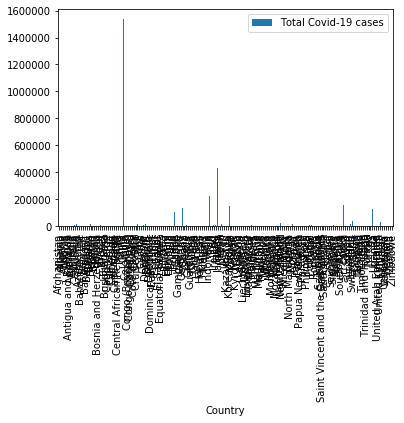

In [136]:
dfp1.plot(x='Country',y='Total Covid-19 cases',kind = 'bar')
plt.show()

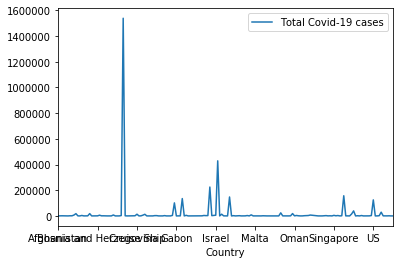

In [137]:
dfp1.plot(x='Country',y='Total Covid-19 cases',kind = 'line')
plt.show()

In [138]:
top20=dfp1.nlargest(20,'Total Covid-19 cases')
top20

,Country,Total Covid-19 cases
33,China,1538032
81,Italy,428621
77,Iran,224700
145,Spain,156912
87,"Korea, South",147381
63,Germany,135037
160,US,124813
59,France,101444
150,Switzerland,39007
164,United Kingdom,29253


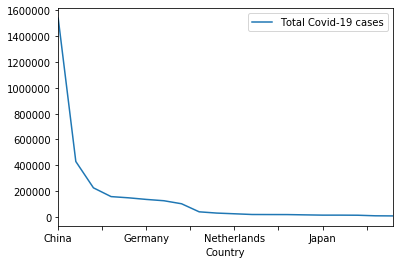

In [139]:
top20.plot(x='Country',y='Total Covid-19 cases',kind='line')

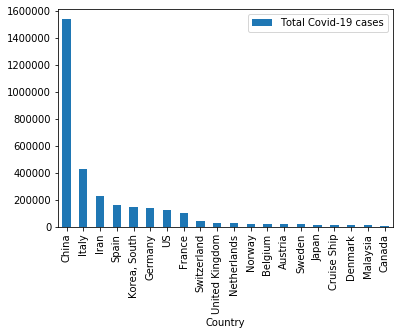

In [140]:
top20.plot(x='Country',y='Total Covid-19 cases',kind='bar')

In [157]:
df3=df2.loc[df2['Country/Region'] == 'Italy']

In [158]:
df3

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
81,Italy,3089,3858,4636,5883,7375,9172,10149,12462,12462,...,21157,24747,27980,31506,35713,41035,47021,53578,59138,428621


In [159]:
df4=df3.drop(columns=['Country/Region','Total '])
df4

,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
81,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138


In [144]:
dates=list(df4.columns)

In [160]:
cases=[]
for date in dates:
    x=df4.get_value(81,date)
    cases.append(x)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
task2=pd.DataFrame(columns=['dates','cases'])

In [162]:
task2['dates']=dates

In [163]:
task2['cases']=cases

In [164]:
task2

,dates,cases
0,3/4/20,3089
1,3/5/20,3858
2,3/6/20,4636
3,3/7/20,5883
4,3/8/20,7375
5,3/9/20,9172
6,3/10/20,10149
7,3/11/20,12462
8,3/12/20,12462
9,3/13/20,17660


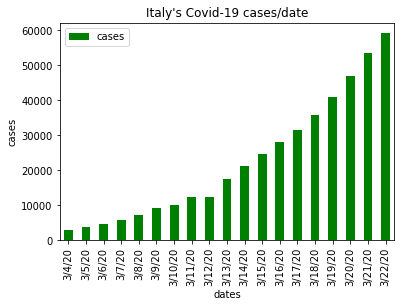

In [167]:
task2.plot(x='dates',y='cases',kind='bar',color='green')
plt.ylabel('cases')
plt.title('Italy\'s Covid-19 cases/date')
plt.show()

In [178]:
continents = pd.read_csv("continent.csv", sep=',')

In [179]:
continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [180]:
df2

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
0,Afghanistan,1,1,1,1,4,4,5,7,7,...,11,16,21,22,22,22,24,24,40,240
1,Albania,0,0,0,0,0,2,10,12,23,...,38,42,51,55,59,64,70,76,89,624
2,Algeria,12,12,17,17,19,20,20,20,24,...,37,48,54,60,74,87,90,139,201,977
3,Andorra,1,1,1,1,1,1,1,1,1,...,1,1,2,39,39,53,75,88,113,421
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Uzbekistan,0,0,0,0,0,0,0,0,0,...,0,1,6,10,15,23,33,43,43,174
167,Venezuela,0,0,0,0,0,0,0,0,0,...,2,10,17,33,36,42,42,70,70,322
168,Vietnam,16,16,16,18,30,30,31,38,39,...,53,56,61,66,75,85,91,94,113,975
169,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,3,11


In [181]:
merged_df = pd.merge(left=df2, right=continents, left_on='Country/Region', right_on='Country')

In [184]:
merged_df

,Country/Region,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total,Continent,Country
0,Afghanistan,1,1,1,1,4,4,5,7,7,...,21,22,22,22,24,24,40,240,Asia,Afghanistan
1,Albania,0,0,0,0,0,2,10,12,23,...,51,55,59,64,70,76,89,624,Europe,Albania
2,Algeria,12,12,17,17,19,20,20,20,24,...,54,60,74,87,90,139,201,977,Africa,Algeria
3,Andorra,1,1,1,1,1,1,1,1,1,...,2,39,39,53,75,88,113,421,Europe,Andorra
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,2,5,Africa,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Uzbekistan,0,0,0,0,0,0,0,0,0,...,6,10,15,23,33,43,43,174,Asia,Uzbekistan
149,Venezuela,0,0,0,0,0,0,0,0,0,...,17,33,36,42,42,70,70,322,South America,Venezuela
150,Vietnam,16,16,16,18,30,30,31,38,39,...,61,66,75,85,91,94,113,975,Asia,Vietnam
151,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,2,2,2,2,3,11,Africa,Zambia


In [186]:
merged1 = merged_df.groupby(['Continent'],as_index=False).sum()

In [187]:
merged1

,Continent,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,Total
0,Africa,21,24,43,43,83,91,103,114,130,...,248,305,380,458,568,720,896,1064,1299,6762
1,Asia,84123,84927,86461,87748,88687,89391,90547,92070,93248,...,96754,98590,100074,102034,103943,106202,108351,110856,113760,1832736
2,Europe,4336,5736,7493,9637,12174,14960,18351,23373,24101,...,46321,54661,65376,76437,89991,108143,128470,149774,168121,1045620
3,North America,188,260,320,465,599,681,1060,1426,1837,...,3044,3897,5231,7154,8738,14874,20595,27543,35742,136108
4,Oceania,55,58,64,68,81,96,112,133,133,...,256,305,385,464,588,710,832,1125,1383,7053
5,South America,16,22,34,40,62,69,91,124,143,...,358,421,637,920,1155,1643,2259,2964,4096,15347


In [189]:
top5continents=merged1.nlargest(5,'Total ')

In [190]:
h1=top5continents['Continent']
h2=top5continents['Total ']
h3=top5continents['3/22/20']
task3=pd.DataFrame(columns=['Continent','Cases'])
task3['Continent']=h1
task3['Cases']=h2
task3

,Continent,Cases
1,Asia,1832736
2,Europe,1045620
3,North America,136108
5,South America,15347
4,Oceania,7053


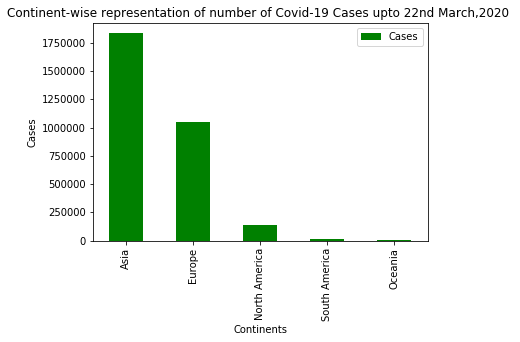

In [191]:
task3.plot(x='Continent',y='Cases',kind='bar',color='green')
plt.xlabel('Continents')
plt.ylabel('Cases')
plt.title('Continent-wise representation of number of Covid-19 Cases upto 22nd March,2020 ')
plt.show()

In [192]:
t4=pd.DataFrame(columns=['Continent','Cases'])
t4['Continent']=h1
t4['Cases']=h3
t4

,Continent,Cases
1,Asia,113760
2,Europe,168121
3,North America,35742
5,South America,4096
4,Oceania,1383


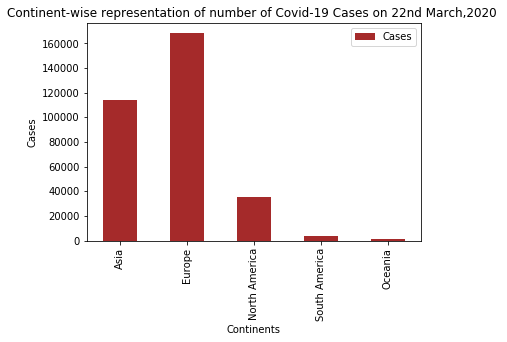

In [195]:
t4.plot(x='Continent',y='Cases',kind='bar',color='brown')
plt.xlabel('Continents')
plt.ylabel('Cases')
plt.title('Continent-wise representation of number of Covid-19 Cases on 22nd March,2020 ')
plt.show()